In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [4]:

data = pd.read_csv('creditcard.csv')

# Data Cleaning and Preparation

In [5]:

def clean_data(df):
    df = df.dropna()
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df

data = clean_data(data)



# Calculate Key Statistics

In [6]:
mean_amount = data['Amount'].mean()
median_amount = data['Amount'].median()
std_amount = data['Amount'].std()

print(f"Mean: {mean_amount}")
print(f"Median: {median_amount}")
print(f"Standard Deviation: {std_amount}")

Mean: 34.8969267149174
Median: 16.57
Standard Deviation: 41.82230319604628


# Identify Transactions Below $100

In [17]:
low_value_transactions = data[data['Amount'] < 100]
low_value_percentage = (len(low_value_transactions) / len(data)) * 100

print(f"Percentage of transactions below $100: {low_value_percentage:.2f}%")



Percentage of transactions below $100: 90.15%


# Identify High-Value Transactions (Outliers)

In [16]:

high_value_transactions = data[data['Amount'] >= 100]
high_value_count = len(high_value_transactions)

print(f"Number of transactions above $100: {high_value_count}")


Number of transactions above $100: 14416


# Exploratory Visualization (Histogram of 'Amount')

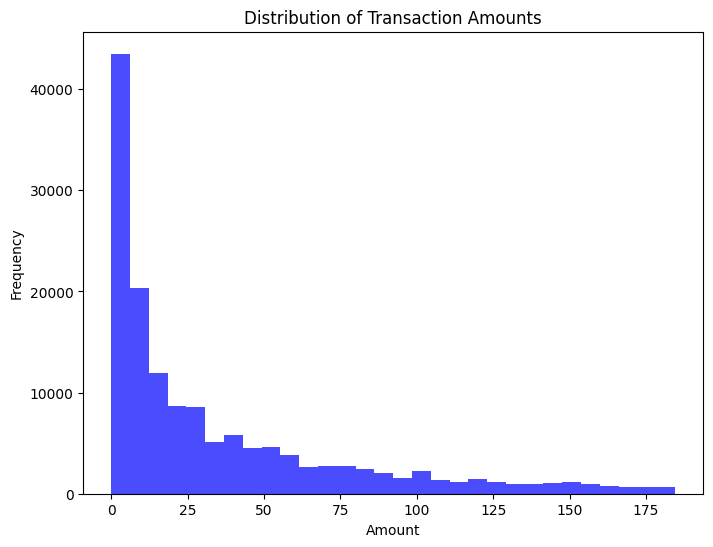

In [7]:

def plot_histogram():
    plt.figure(figsize=(8, 6))
    plt.hist(data['Amount'], bins=30, color='blue', alpha=0.7)
    plt.title('Distribution of Transaction Amounts')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram()



# K-Means Clustering

In [8]:

def perform_kmeans(df, num_clusters):
    X = df[['V1', 'V2', 'V3', 'V4', 'V5']]
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X)
    distortions = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), distortions, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

    return df



# Perform K-Means with 3 Clusters

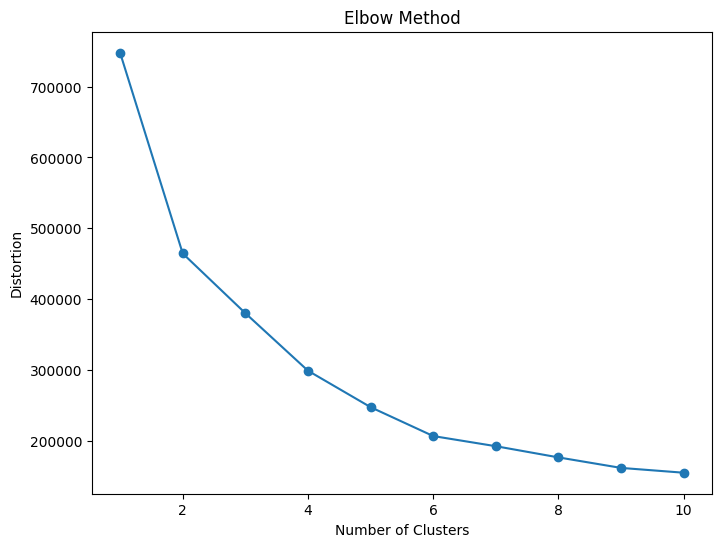

In [9]:
data = perform_kmeans(data, num_clusters=3)

# Scatter Plot of Clusters

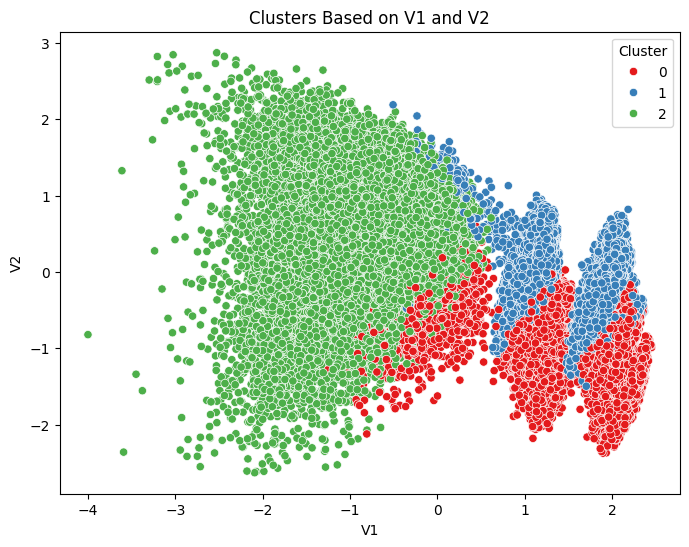

In [10]:

def plot_clusters():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='V1', y='V2', hue='Cluster', data=data, palette='Set1')
    plt.title('Clusters Based on V1 and V2')
    plt.xlabel('V1')
    plt.ylabel('V2')
    plt.show()

plot_clusters()



# Linear Regression

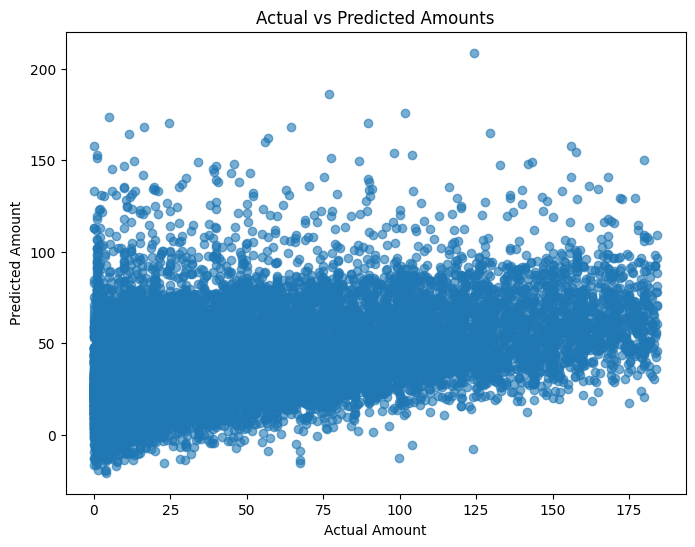

In [11]:
def perform_regression(df):
    X = df[['V1', 'V2', 'V3']]
    y = df['Amount']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.title('Actual vs Predicted Amounts')
    plt.xlabel('Actual Amount')
    plt.ylabel('Predicted Amount')
    plt.show()

    return model

model = perform_regression(data)



# Heatmap of Correlation Matrix

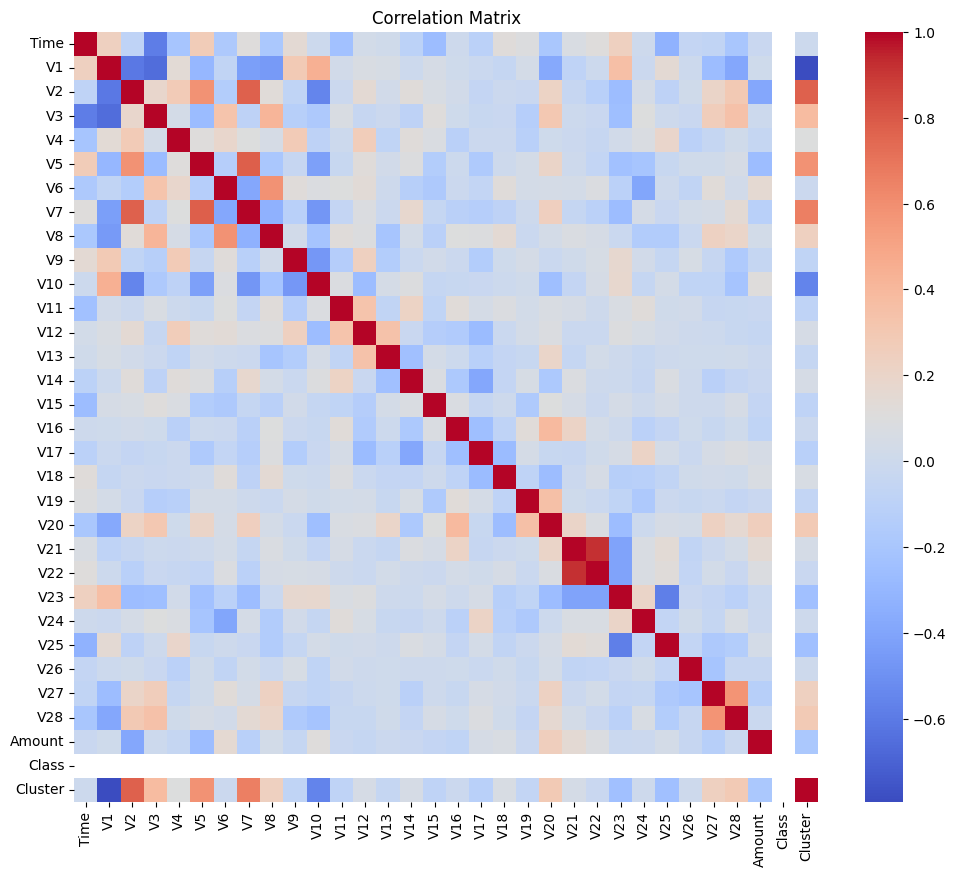

In [12]:

def plot_heatmap():
    plt.figure(figsize=(12, 10))
    sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
    plt.title('Correlation Matrix')
    plt.show()

plot_heatmap()


# Save the dataset with clusters

In [13]:
data.to_csv('creditcard_with_clusters.csv', index=False)